# MODELIZACIÓN PARA NO SUPERVISADO

## IMPORTAR PAQUETES

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [16]:
ruta_proyecto = 'C:/Users/Ana/Desktop/DATA_SCIENCE_FOR_BUSINESS/PYTHON_DATA_SCIENCE_MASTERY/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS_/01_LEADSCORING'

Nombres de los ficheros de datos.

In [17]:
nombre_df = 'df_tablon.pickle'


Cargar los datos.

In [18]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [19]:
df.drop(columns = ['fuente_Chat',
                   'fuente_Direct Traffic',
                   'fuente_Google',
                   'fuente_OTROS',
                   'fuente_Organic Search',
                   'fuente_Reference', 
                   'score_actividad_mms',
                   'score_perfil_mms', 
                   'ambito_Banking, Investment And Insurance',
                   'ambito_Business Administration',
                   'ambito_Finance Management',
                   'ambito_Healthcare Management',
                   'ambito_Human Resource Management',
                   'ambito_IT Projects Management',
                   'ambito_International Business',
                   'ambito_Marketing Management',
                   'ambito_Media and Advertising',
                   'ambito_OTROS',
                   'ambito_Operations Management', 
                   'ambito_Select', 
                   'ambito_Supply Chain Management',
                   'ambito_Travel and Tourism',
                   'descarga_lm_No',
                   'descarga_lm_Yes', 
                   'visitas_total_mms',
                   'paginas_vistas_visita_mms'
                   ], inplace= True)

## MODELIZAR

### Crear el espacio de soluciones

In [20]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [21]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [22]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [23]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,5198.26,0.29,1415.61,1.50
4,4620.90,0.33,1261.60,1.53
5,4094.63,0.35,1221.98,1.45
6,3611.78,0.38,1236.49,1.49


#### Analizar los gráficos

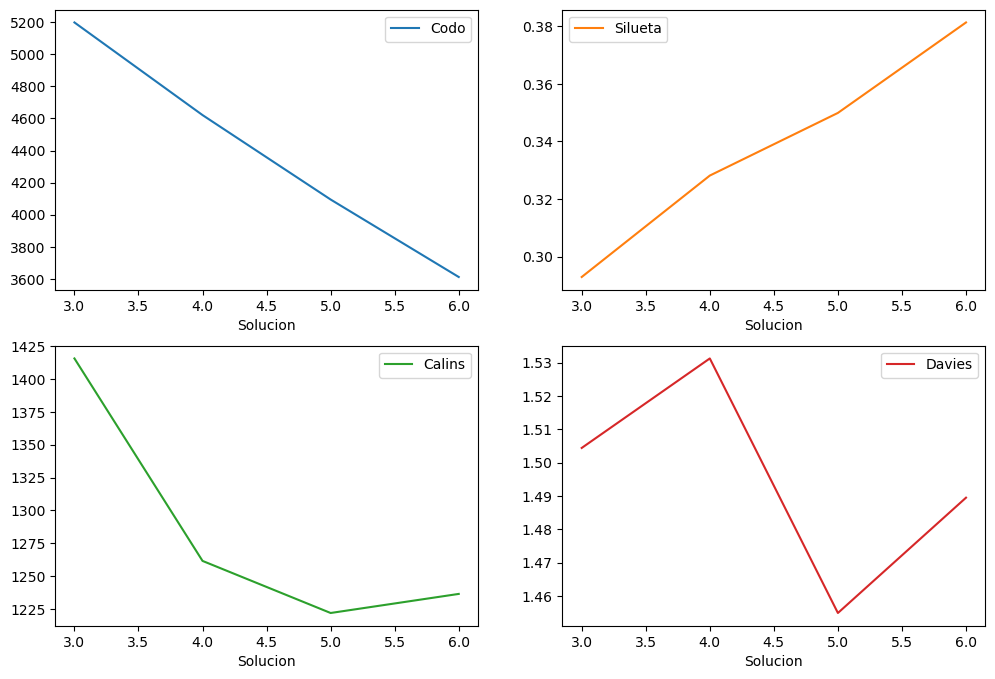

In [24]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

### Segmentación final con la mejor solucion

In [25]:
mejor_solucion = 6

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=6, n_init=10)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [26]:
df['segmento'] = cluster.predict(df)

## PERFILAR LOS SEGMENTOS

In [27]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5
origen_API,0.000000,0.300499,0.000000,0.972527,0.202934,0.976852
origen_Landing Page Submission,0.995413,0.582294,0.959696,0.000000,0.574572,0.000000
origen_Lead Add Form,0.000000,0.113466,0.040304,0.000000,0.217604,0.012346
origen_OTROS,0.004587,0.003741,0.000000,0.027473,0.004890,0.010802
ult_actividad_Chat Conversation,0.048624,0.001247,0.000000,0.000000,0.014670,0.311728
ult_actividad_Converted to Lead,0.159633,0.000000,0.000000,0.000000,0.036675,0.163580
ult_actividad_Email Link Clicked,0.076147,0.011222,0.000000,0.000000,0.026895,0.084877
ult_actividad_Email Opened,0.000000,0.000000,1.000000,1.000000,0.376528,0.000000
ult_actividad_OTROS,0.094495,0.046135,0.000000,0.000000,0.088020,0.092593
ult_actividad_Page Visited on Website,0.218349,0.007481,0.000000,0.000000,0.056235,0.166667


Segmentos que convierten bien: 0, 3, 5

 - Segmento 0:  convierte en un 92%, se corresponde con un working professional, su ultima áctividad esta en sms (40%) y un email (37%), origen mayoritario Landing Page 56%
 - Segmento 3:  se corresponde con desempleados que si convierten en un 77%, alos que se les mandó un sms y cuyo origen en una API
 - Segmento 5: convierte 51%, se correspone con desempleados 98%, a los que se les mandó un sms 100% y cuyo origen es Landin Page 99%
 
 Entre los que menos convierten se encuentra el segmento 1 que se corresponde con desempleados 95%, con oringen API 100%

El chat NO genera leads de calidad

El sms si funciona con desempleados 98% y convierten 51%

El email tambien funciona con desempleados , pero al final no convierten

In [28]:
df.segmento.value_counts(normalize= True)

segmento
2   0.27
0   0.23
1   0.17
5   0.13
3   0.11
4   0.09
Name: proportion, dtype: float64

Entre los 3 segmentos que mas convierten 0,3 y 5 tenemos un 38% de leads generados de buena calidad

Entre los segmentos de peor calidad 1 y 4 tenemos un 34% de lead (insight), ya que no vamos a poder convertir a ninguno de ellos; podriamos prescindir de estos leads
Revisar cómo estan llegando estos leads


**Aunque no coincide con los resultados de isaac, continuo**